<a href="https://colab.research.google.com/github/NTsering/Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
#Path to dataset: https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv 
drive.mount('/content/drive')

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/NLP/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset-master/train.tsv', sep = '\t', header=0)

In [16]:
dataset.head(n = 10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [56]:
dataset.shape

(156060, 4)

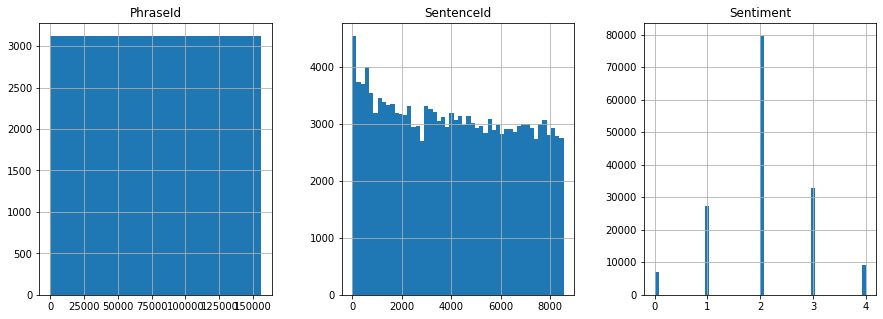

In [57]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(15,5), layout=(1,3))
plt.show()